## Installation

In [1]:
!pip install hazm
!pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=daf611ba7293b13c56b270b543d5a3f9f6743eded6167ec22fd0b4815613dfc9
  Stored in directory: /root/.cache/pip/wheels/19/1d/3a/0a8c14c30132b4f9ffd796efbb6746f15b3d6bcfc1055a9346
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp38-cp38-linux_x86_64.whl size=180658 sha256=cce4f140325ba406741bc7db22fdd624c4fc93c753fc42f2f2eda5d5d9c0f0e8
  Stored in directory: /root/.cache/pip/wheels/3c/d8/9f/59fd78b2b7d1e9ffcb68fb6de80c2e7c20b804c8cbc4d8fc23
Successfully built nltk libwapiti
  Attempting unin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading data

In [3]:
import json

In [4]:
def read_json(path):
  file = open(path)
  data = json.load(file)
  return data

In [5]:
input_data = read_json('/content/drive/MyDrive/IR_data_news_12k.json')

In [6]:
print(list(input_data.values())[0])

{'title': 'اعلام زمان قرعه کشی جام باشگاه های فوتسال آسیا', 'content': '\nبه گزارش خبرگزاری فارس، کنفدراسیون فوتبال آسیا (AFC) در نامه ای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان\xa0 قرعه کشی جام باشگاه های فوتسال آسیا را رسماً اعلام کرد. بر این اساس 25 فروردین ماه 1401 مراسم قرعه کشی جام باشگاه های فوتسال آسیا در مالزی برگزار می شود. باشگاه گیتی پسند بعنوان قهرمان فوتسال ایران در سال 1400 به این مسابقات راه پیدا کرده است. پیش از این گیتی پسند تجربه 3 دوره حضور در جام باشگاه های فوتسال آسیا را داشته که هر سه دوره به فینال مسابقات راه پیدا کرده و یک عنوان قهرمانی و دو مقام دومی بدست آورده است. انتهای پیام/\n\n\n', 'tags': ['اعلام زمان', 'قرعه\u200cکشی', 'قرعه\u200cکشی جام', 'قرعه\u200cکشی جام باشگاه\u200cهای فوتسال', 'ای اف سی', 'گیتی پسند'], 'date': '3/15/2022 5:59:27 PM', 'url': 'https://www.farsnews.ir/news/14001224001005/اعلام-زمان-قرعه-کشی-جام-باشگاه-های-فوتسال-آسیا', 'category': 'sports'}


In [7]:
print(list(input_data.values())[0].keys())

dict_keys(['title', 'content', 'tags', 'date', 'url', 'category'])


In [8]:
contents = [input_data[i]['content'] for i in input_data]

In [9]:
print(len(contents))

12202


In [10]:
print(contents[0])


به گزارش خبرگزاری فارس، کنفدراسیون فوتبال آسیا (AFC) در نامه ای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان  قرعه کشی جام باشگاه های فوتسال آسیا را رسماً اعلام کرد. بر این اساس 25 فروردین ماه 1401 مراسم قرعه کشی جام باشگاه های فوتسال آسیا در مالزی برگزار می شود. باشگاه گیتی پسند بعنوان قهرمان فوتسال ایران در سال 1400 به این مسابقات راه پیدا کرده است. پیش از این گیتی پسند تجربه 3 دوره حضور در جام باشگاه های فوتسال آسیا را داشته که هر سه دوره به فینال مسابقات راه پیدا کرده و یک عنوان قهرمانی و دو مقام دومی بدست آورده است. انتهای پیام/





## Preprocessing

In [11]:
from parsivar import Normalizer, Tokenizer, FindStems
from hazm import stopwords_list

In [12]:
normalizer = Normalizer()
tokenizer = Tokenizer()
stemmer = FindStems()

In [13]:
stopwords = {stopwords_list()[i] for i in range(0, len(stopwords_list()) - 1)}
extra_stopwords = ['،', '.', ')', '(', '}', '{', '«', '»', '؛', ':',  '؟','>','<','|','+','-','*',"^",'%','#','=','_','/','«','»','$','[',']','&',"❊",'«','»']
stopwords.update(extra_stopwords)

In [14]:
def preprocess(contents, rm_sw=True, stemming=True):
  preprocessed_docs = []
  for content in contents:
    
    # normalizing
    normalized_content = normalizer.normalize(content)
    content_tokens = tokenizer.tokenize_words(normalized_content)
    tokens = []
    for token in content_tokens:
      # stemming
      if stemming:
        token = stemmer.convert_to_stem(token)
      # remove stopwords
      if rm_sw:
          if token in stopwords:
                continue
      tokens.append(token)
    preprocessed_docs.append(tokens)
    # tokens of each doc
  return preprocessed_docs



In [15]:
preprocessed_docs = preprocess(contents)

In [16]:
print(len(preprocessed_docs))

12202


## Positional indexing

In [17]:
class Term:
    def __init__(self):
        self.total_freq = 0
        self.pos_in_doc = {} 
        self.freq_in_doc = {}

    def update_posting(self, doc_id, term_position):
      if doc_id not in self.pos_in_doc:
            self.pos_in_doc[doc_id] = []
            self.freq_in_doc[doc_id] = 0 
      self.pos_in_doc[doc_id].append(term_position)
      self.freq_in_doc[doc_id] += 1
      self.total_freq += 1

In [18]:
def positional_indexing(preprocessed_docs):
    p_inv_index = {} 
    for doc_id in range(len(preprocessed_docs)):
        for pos in range(len(preprocessed_docs[doc_id])):
            term = preprocessed_docs[doc_id][pos]
            if term in p_inv_index:
                term_obj = p_inv_index[term]
            else:
                term_obj = Term()
            term_obj.update_posting(doc_id, pos)
            p_inv_index[term] = term_obj

    return p_inv_index

In [19]:
positional_index = positional_indexing(preprocessed_docs)

In [20]:
print(positional_index['گزارش'].pos_in_doc)

{0: [0], 1: [0], 2: [0], 3: [0], 4: [0], 5: [0], 6: [0, 57], 7: [0], 8: [0], 9: [0], 10: [0], 11: [0], 12: [0], 13: [0], 14: [0], 15: [0], 16: [0], 17: [0, 62], 18: [0], 19: [0, 64, 86], 20: [0], 21: [0], 22: [0], 23: [0], 24: [0], 25: [0, 35, 45], 26: [0], 28: [0, 50, 146], 30: [0], 32: [0], 33: [0], 34: [0], 35: [0], 36: [0], 37: [0], 38: [0], 39: [0], 40: [0], 41: [0], 42: [0], 43: [0], 45: [0], 46: [0], 47: [0], 48: [0], 49: [0], 51: [0], 52: [0], 53: [0], 54: [0], 55: [0], 56: [0], 57: [0], 58: [0], 59: [0], 60: [0], 61: [0], 62: [0], 63: [0], 65: [0], 66: [0], 67: [0], 68: [0, 261], 69: [0], 70: [0], 72: [0], 73: [0], 74: [0], 75: [0], 76: [0, 115], 77: [0, 26], 78: [0], 79: [0], 80: [0], 81: [0], 82: [0], 83: [0], 84: [0], 85: [0], 86: [0], 87: [0], 88: [0], 89: [0], 90: [0], 92: [0], 93: [0], 94: [0], 95: [0], 96: [0], 97: [0], 98: [0], 99: [0], 100: [0], 101: [0], 102: [0], 103: [0], 105: [0], 106: [0], 107: [0], 108: [0], 109: [0, 28], 110: [0], 111: [0], 112: [0, 76], 113: [

In [ ]:
preprocessed_docs[6]

In [22]:
print(positional_index['گزارش'].freq_in_doc)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 2, 18: 1, 19: 3, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 3, 26: 1, 28: 3, 30: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 65: 1, 66: 1, 67: 1, 68: 2, 69: 1, 70: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 2, 77: 2, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 2, 110: 1, 111: 1, 112: 2, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 2, 125: 1, 126: 2, 127: 1, 129: 1, 130: 1, 131: 2, 132: 1, 133: 1, 134: 3, 135: 1, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 

In [23]:
# check the value of total_freq is correct or not
print(positional_index['گزارش'].total_freq)
print(sum(positional_index['گزارش'].freq_in_doc.values()))

14013
14013


## Zipf's law

In [24]:
import operator
import math
import matplotlib.pyplot as plt

In [25]:
# without stop word : (preproccessed_docs, positional_index)
# with stop words : (preprocessed_docs_2, positional_index_with_stopwords )
preprocessed_docs_2 = preprocess(contents, False, True)
positional_index_with_stopwords = positional_indexing(preprocessed_docs_2)

In [26]:
def calculate_rfc(index):
  # descending order
  # sort term based on their total freq, (large,small)
  # the word with most freq must be in rank 1
  # if we dont remove stopwords they will be rank1 
    sorted_index = sorted(index.values(), key=operator.attrgetter('total_freq'), reverse=True)
    max_freq = sorted_index[0].total_freq
    log_rank, log_freq,log_cf = ([],[],[])

    for i, term in enumerate(sorted_index):
        log_rank.append(math.log(i+1, 10))
        log_freq.append(math.log(term.total_freq, 10))
        log_cf.append(math.log(max_freq/(i+1), 10))
  
    return log_rank,log_freq,log_cf

In [27]:
def plot_zipf(log_rank,log_freq,log_cf, stop_words_flag):
    plt.plot(log_rank, log_freq, label = 'rank-freq')
    plt.plot(log_rank, log_cf,label = 'rank-cf')
    plt.xlabel('log10 rank')
    plt.ylabel('log10 frequency')
    plt.legend()
    
    if stop_words_flag:
        plt.title("Zipf's law without removing stop words")
    else:
        plt.title("Zipf's law with removing stop words")
    plt.show()

In [28]:
log_rank, log_freq, log_cf = calculate_rfc(positional_index_with_stopwords)

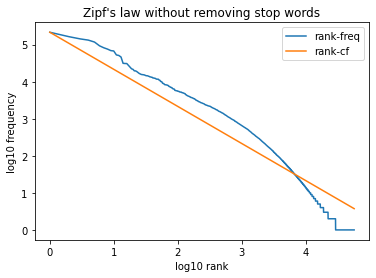

In [29]:
plot_zipf(log_rank,log_freq,log_cf, stop_words_flag=True)

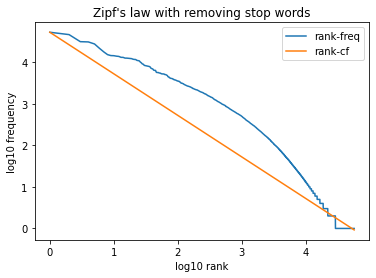

In [30]:
log_rank, log_freq, log_cf = calculate_rfc(positional_index)
plot_zipf(log_rank,log_freq,log_cf, stop_words_flag = False)

## Heaps Law

In [31]:
import numpy as np

In [32]:
def collection_vocab_size(contents, stemming,top_first_doc):
    preprocessed_docs_3 = preprocess(contents[:top_first_doc], True, stemming)
    # collection size -> all of docs word
    collection_size = 0
    for doc in preprocessed_docs_3:
        collection_size += len(doc)
    # unique words 
    vocab_size = len(positional_indexing(preprocessed_docs_3))
    return collection_size,vocab_size

In [33]:
def calculate_m_t(stemming):
  doc_length = [500, 1000, 1500, 2000]
  if stemming:
    print('After stemming:')
  else:
    print('Before stemming')
  return_t, return_m = ([],[])
  for num in doc_length:
    print(f'First {num} Docs')
    T_size, M_size = collection_vocab_size(contents,stemming,num)
    print('vocab size : ', M_size, '  collection size: ', T_size)
    return_t.append(T_size)
    return_m.append(M_size)
  return return_t, return_m

In [34]:
doc_length = [500, 1000, 1500, 2000]

# M = k * (T ^ b)
# M is the size of the vocabulary, T is the number of tokens in the collection

ta, ma = calculate_m_t(True)
print('-----------------------------------')
tb, mb = calculate_m_t(False)


After stemming:
First 500 Docs
vocab size :  7767   collection size:  80287
First 1000 Docs
vocab size :  11351   collection size:  164475
First 1500 Docs
vocab size :  13705   collection size:  248561
First 2000 Docs
vocab size :  15679   collection size:  326937
-----------------------------------
Before stemming
First 500 Docs
vocab size :  10093   collection size:  75476
First 1000 Docs
vocab size :  15082   collection size:  154565
First 1500 Docs
vocab size :  18421   collection size:  233325
First 2000 Docs
vocab size :  21099   collection size:  306798


In [35]:
def plot_heaps(input_m, input_t, stemming):

    log_M = np.log10(input_m)
    log_T = np.log10(input_t)
    plt.plot(log_T, log_M,label='actual')

    # a vector of coefficients p that minimises the squared error in the order of degree
    # Degree of the fitting polynomial
    [b, log_k] = np.polyfit(log_T, log_M, 1)
    plt.plot(log_T, b * log_T + log_k,label='heap')
    if stemming:
      plt.title("Actual value after stemming VS Heaps' Law after stemming")
    else:
      plt.title("Actual value before stemming VS Heaps' Law before stemming")
    plt.legend()
    plt.xlabel('log10 T')
    plt.ylabel('log10 M')
    plt.show()

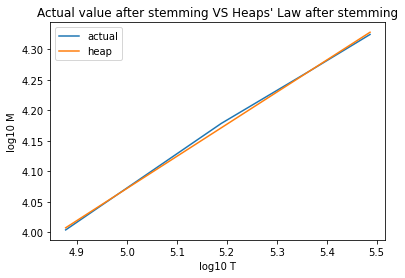

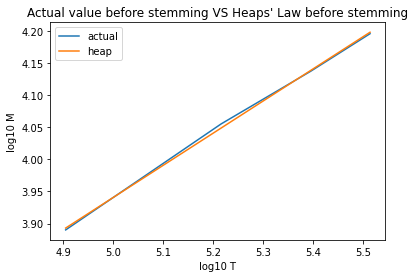

In [36]:
plot_heaps(mb,tb,True)
plot_heaps(ma,ta,False)

## Answering Query

In [37]:
from itertools import permutations
import re

In [38]:
def positional_intersect(pos_dict_1, pos_dict_2, k):

# used when we have phrase queries 
# to find intersection between words of our query based on distance

    doc_ids_1 = list(pos_dict_1.keys())
    doc_ids_2 = list(pos_dict_2.keys())
    doc_ids_1.sort()
    doc_ids_2.sort()

    answer = []
    i, j = 0, 0
    
    while i < len(doc_ids_1) and j < len(doc_ids_2):
        doc_id_1 = doc_ids_1[i]
        doc_id_2 = doc_ids_2[j]

        if doc_id_1 == doc_id_2:
            pos_list_1 = pos_dict_1[doc_id_1]
            pos_list_2 = pos_dict_2[doc_id_2]

            for pos in pos_list_1:
                if pos + k in pos_list_2 or pos - k in pos_list_2:
                    answer.append(doc_id_1)

            i, j = i + 1, j + 1
            
        elif doc_id_1 < doc_id_2:
            i += 1
        else:
            j += 1

    return answer

In [39]:
def process_phrase(tokens):

    result = []
# used when we have more than 2 words in our phrase
# split it to 2 biword index
# aggregate the results
    for biword in permutations(tokens, 2):
        w1 = biword[0]
        w2 = biword[1]
        if (w1 not in positional_index.keys()) or (w2 not in positional_index.keys()):
            return []
        
        indx1 = tokens.index(w1)
        indx2 = tokens.index(w2)
        pos_dic_1 = positional_index.get(w1).pos_in_doc
        pos_dic_2 = positional_index.get(w2).pos_in_doc  
        k = abs(indx1-indx2)

        docs = positional_intersect(pos_dic_1, pos_dic_2, k)
        
        if len(result) == 0:
            result = docs
        else:
            result = list(set(result) & set(docs))

    return result

In [40]:
def process_query(not_words=[], phrases=[], words=[]):
    ranks={}
    
    # find words
    for token in words:
        if token in positional_index.keys():
            for doc_id in positional_index[token].pos_in_doc.keys():
                if doc_id in ranks.keys():
                    ranks[doc_id]+=1
                else:
                    ranks[doc_id]=1
    # find phrases
    for phrase in phrases:
        for doc_id in process_phrase(phrase):
            if doc_id in ranks.keys():
                ranks[doc_id] += 1
            else:
                ranks[doc_id] = 1
    # find ! not words
    not_words_docs = []
    for word in not_words:
        doc_ids = positional_index[word].pos_in_doc.keys()
        for doc_id in doc_ids:
            not_words_docs.append(doc_id)
            
    # from results remove docs which contain not
    if len(ranks) > 0:
        for doc in not_words_docs:
            if doc in ranks.keys():
                del ranks[doc]
                
    ranks = dict(sorted(ranks.items(), key=lambda x: x[1], reverse=True))
    
    return ranks

In [41]:
def not_terms(query):
    splitted_query = query.split()
    indices = [i for i in range(len(splitted_query)) if splitted_query[i]=='!']
    result = [splitted_query[i+1] for i in indices]
    return result

In [42]:
def get_phrase(query):
    res = []
    quoted = re.compile('"[^"]*"')
    for value in quoted.findall(query):
        value = value.replace('"', '').strip().split()
        res.append(value)
    return res

In [43]:
def search_query(query):
    # preprocessed query
    query = ' '.join(preprocess([query], True, True)[0])
    phrases = get_phrase(query)
    flat_phrases = [item for sublist in phrases for item in sublist]
    not_words = not_terms(query)
    query = query.replace('"','')
    query = query.replace('!', '')
    splitted_query = query.split()
    looking_words = []
    for x in splitted_query:
      if x not in not_words and x not in flat_phrases:
        looking_words.append(x)
    output = process_query(not_words=not_words, phrases=phrases, words=looking_words)  
    return output

In [46]:
def print_output(output_dict):
    ids = list(output_dict.keys())[:5]
    for i in range(len(ids)):
        print(f'Rank {i + 1}:')
        title = input_data[str(ids[i])]['title']
        url = input_data[str(ids[i])]['url']
        print('title: ', title, '\nurl: ', url)
        print('------------')

In [47]:
query = 'تحریم‌های آمریکا علیه ایران'
res = search_query(query)
print_output(res)

Rank 1:
title:  خبرگزاری فارس ۱۹ ساله شد 
url:  https://www.farsnews.ir/news/14001122000809/خبرگزاری-فارس-۱۹-ساله-شد
------------
Rank 2:
title:  اصولی: فدراسیون فوتبال جمهوری اسلامی ایران هستیم نه جزیره مستقل/ با گفتار ساختارشکنانه فدراسیون را به ناکجا آباد می‌برند 
url:  https://www.farsnews.ir/news/14001117000518/اصولی-فدراسیون-فوتبال-جمهوری-اسلامی-ایران-هستیم-نه-جزیره-مستقل-با
------------
Rank 3:
title:  احتمال مبادله نازنین زاغری در ازای 530میلیون دلار 
url:  https://www.farsnews.ir/news/14001223001080/احتمال-مبادله-نازنین-زاغری-در-ازای-530میلیون-دلار
------------
Rank 4:
title:  متکی: آمریکا با ابزار ناتو به دنبال تجزیه روسیه است 
url:  https://www.farsnews.ir/news/14001222000749/متکی-آمریکا-با-ابزار-ناتو-به-دنبال-تجزیه-روسیه-است
------------
Rank 5:
title:  توضیحات یک منبع آگاه درباره وقفه مذاکرات وین 
url:  https://www.farsnews.ir/news/14001222000450/توضیحات-یک-منبع-آگاه-درباره-وقفه-مذاکرات-وین
------------


In [48]:
query = 'تحریم‌های آمریکا ! ایران'
res = search_query(query)
print_output(res)

Rank 1:
title:  ادامه تحریم‌های سیاسی علیه المپیک پکن/ژاپن هم به صف منتقدان پیوست 
url:  https://www.farsnews.ir/news/14001003000306/ادامه-تحریم‌های-سیاسی-علیه-المپیک-پکن-ژاپن-هم-به-صف-منتقدان-پیوست
------------
Rank 2:
title:  انتقاد دانشجویان ایرانی در اروپا به برخورد دوگانه مدعیان حقوق بشر با قضایای اوکراین و جنایت‌های آل سعود 
url:  https://www.farsnews.ir/news/14001224000014/انتقاد-دانشجویان-ایرانی-در-اروپا-به-برخورد-دوگانه-مدعیان-حقوق-بشر-با
------------
Rank 3:
title:  محو رژیم صهیونیستی از آرمان‌های نظام اسلامی حذف نشده است 
url:  https://www.farsnews.ir/news/14001222000379/محو-رژیم-صهیونیستی-از-آرمان‌های-نظام-اسلامی-حذف-نشده-است
------------
Rank 4:
title:  تجربه نشان داده به عهد آمریکا در مذاکرات نمی‌شود اعتماد کرد 
url:  https://www.farsnews.ir/news/14001203000366/تجربه-نشان-داده-به-عهد-آمریکا-در-مذاکرات-نمی‌شود-اعتماد-کرد
------------
Rank 5:
title:  سود مافیای اسلحه‌سازی آمریکا در ناامن بودن جهان است 
url:  https://www.farsnews.ir/news/14001211000898/سود-مافیای-اسلحه‌سازی-

In [49]:
query = '"کنگره ضدتروریست"'
res = search_query(query)
print_output(res)

Rank 1:
title:  توضیحات یک منبع آگاه درباره وقفه مذاکرات وین 
url:  https://www.farsnews.ir/news/14001222000450/توضیحات-یک-منبع-آگاه-درباره-وقفه-مذاکرات-وین
------------


In [50]:
query = '"تحریم هسته‌ای" آمریکا ! ایران'
res = search_query(query)
print_output(res)

Rank 1:
title:  بمب خبری بازگشت مسی به بارسلونا خنثی شد/پای جام جهانی درمیان است 
url:  https://www.farsnews.ir/news/14001221000109/بمب-خبری-بازگشت-مسی-به-بارسلونا-خنثی-شد-پای-جام-جهانی-درمیان-است
------------
Rank 2:
title:  منچستریونایتد به دنبال بهترین بازیکن دنیا / زوج «رونالدو - لواندوفسکی» در اولدترافورد +عکس 
url:  https://www.farsnews.ir/news/14001220000373/منچستریونایتد-به-دنبال-بهترین-بازیکن-دنیا--زوج-رونالدو--لواندوفسکی
------------
Rank 3:
title:  راهیابی بانوی سنگنورد کشورمان به مسابقات جهانی آمریکا 
url:  https://www.farsnews.ir/news/14001217000994/راهیابی-بانوی-سنگنورد-کشورمان-به-مسابقات-جهانی-آمریکا
------------
Rank 4:
title:  مدرس جهانی تنیس روی میز: صحبت‌های عیلقارداشی بیشتر شوخی است تا جدی/در همه زمینه‌ها سقوط کردیم 
url:  https://www.farsnews.ir/news/14001214000887/مدرس-جهانی-تنیس-روی-میز-صحبت‌های-عیلقارداشی-بیشتر-شوخی-است-تا-جدی-در
------------
Rank 5:
title:  راجر فدرر از زمان بازگشتش به میادین پرده برداشت 
url:  https://www.farsnews.ir/news/14001214000736/راجر-ف

In [51]:
query = '"تحریم هسته‌ای" ایران ! آمریکا'
res = search_query(query)
print_output(res)

Rank 1:
title:  ۹ دی یکی از روزهای فراموش نشدنی در تاریخ انقلاب اسلامی است 
url:  https://www.farsnews.ir/news/14001007000363/۹-دی-یکی-از-روزهای-فراموش-نشدنی-در-تاریخ-انقلاب-اسلامی-است
------------
Rank 2:
title:  اعلام زمان قرعه کشی جام باشگاه های فوتسال آسیا 
url:  https://www.farsnews.ir/news/14001224001005/اعلام-زمان-قرعه-کشی-جام-باشگاه-های-فوتسال-آسیا
------------
Rank 3:
title:  محل برگزاری نشست‌های خبری سرخابی‌ها؛ مجیدی در سازمان لیگ، گل‌محمدی در تمرین پرسپولیس 
url:  https://www.farsnews.ir/news/14001224000971/محل-برگزاری-نشست‌های-خبری-سرخابی‌ها-مجیدی-در-سازمان-لیگ-گل‌محمدی-در
------------
Rank 4:
title:  ماجدی در نشست با صالحی امیری: امیدوارم در این دوره تیم  المپیک موفق شود 
url:  https://www.farsnews.ir/news/14001224000964/ماجدی-در-نشست-با-صالحی-امیری-امیدوارم-در-این-دوره-تیم-المپیک-موفق
------------
Rank 5:
title:  مسابقات تنیس روی میز فیدر قطر| هر4 بانوی ملی پوش ایران حذف شدند 
url:  https://www.farsnews.ir/news/14001224000916/مسابقات-تنیس-روی-میز-فیدر-قطر|-هر4-بانوی-ملی-پ

In [52]:
query = 'غزه ! ضدتروریست'
res = search_query(query)
print_output(res)

Rank 1:
title:  سفر تیم فوتبال معلولان فلسطین به تهران 
url:  https://www.farsnews.ir/news/14001212000749/سفر-تیم-فوتبال-معلولان-فلسطین-به-تهران
------------
Rank 2:
title:  بیانیه بسیج ورزشکاران در محکومیت اقدام شرم‌آور سرمربی تیم ملی امید 
url:  https://www.farsnews.ir/news/14000929000204/بیانیه-بسیج-ورزشکاران-در-محکومیت-اقدام-شرم‌آور-سرمربی-تیم-ملی-امید
------------
Rank 3:
title:  اقدام تحسین برانگیز سرمربی الجزایر در حمایت از فلسطین/جام قهرمانی به مردم غزه اهدا شد 
url:  https://www.farsnews.ir/news/14000928000274/اقدام-تحسین-برانگیز-سرمربی-الجزایر-در-حمایت-از-فلسطین-جام-قهرمانی-به
------------
Rank 4:
title:  اردوغان علاوه بر آرمان فلسطین بر باورهای مردم ترکیه هم پا گذاشت 
url:  https://www.farsnews.ir/news/14001220000842/اردوغان-علاوه-بر-آرمان-فلسطین-بر-باورهای-مردم-ترکیه-هم-پا-گذاشت
------------
Rank 5:
title:  نگاه دوگانه برخی جریان‌ها به یمن و اوکراین نشانه سرسپردگی‌شان به آمریکاست 
url:  https://www.farsnews.ir/news/14001209000540/نگاه-دوگانه-برخی-جریان‌ها-به-یمن-و-اوکراین-ن